In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
#Dataset

fifa17 = pd.read_csv("datasets/regression/CLEAN_FIFA17_official_data.csv")
fifa18 = pd.read_csv("datasets/regression/CLEAN_FIFA18_official_data.csv")
fifa19 = pd.read_csv("datasets/regression/CLEAN_FIFA19_official_data.csv")
fifa20 = pd.read_csv("datasets/regression/CLEAN_FIFA20_official_data.csv")
fifa21 = pd.read_csv("datasets/regression/CLEAN_FIFA21_official_data.csv")
fifa22 = pd.read_csv("datasets/regression/CLEAN_FIFA22_official_data.csv")

# Adicionar a Coluna "Year" ao dataset
  
fifa17["Year"] = 2017
fifa18["Year"] = 2018
fifa19["Year"] = 2019
fifa20["Year"] = 2020
fifa21["Year"] = 2021
fifa22["Year"] = 2022

df = pd.concat([fifa17,fifa18,fifa19,fifa20,fifa21,fifa22])
df = df.sample(frac=0.2, random_state=42)

df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Year_Joined,Year,Release Clause(£),DefensiveAwareness
14848,14848,228250,H. Al Ruwaili,23,https://cdn.sofifa.com/players/228/250/19_60.png,Saudi Arabia,https://cdn.sofifa.com/flags/sa.png,55,62,Al Taawoun,...,11.0,13.0,9.0,14.0,RB,54.0,2018,2019,185000.0,NaN
1525,1525,198118,J. Guilavogui,29,https://cdn.sofifa.com/players/198/118/20_60.png,France,https://cdn.sofifa.com/flags/fr.png,78,78,VfL Wolfsburg,...,8.0,14.0,10.0,15.0,CB,80.0,2016,2021,15300000.0,81.0
13179,13179,234671,J. Odgaard,17,https://cdn.sofifa.com/players/234/671/17_60.png,Denmark,https://cdn.sofifa.com/flags/dk.png,58,78,Lyngby BK,...,13.0,13.0,8.0,11.0,ST,57.0,2015,2017,NaN,NaN
12858,12858,247322,T. Schmitt,21,https://cdn.sofifa.com/players/247/322/19_60.png,United States,https://cdn.sofifa.com/flags/us.png,57,68,Real Salt Lake,...,10.0,5.0,14.0,7.0,ST,57.0,2019,2019,306000.0,NaN
8579,8579,51620,C. Varrault,36,https://cdn.sofifa.com/players/051/620/17_60.png,France,https://cdn.sofifa.com/flags/fr.png,70,70,Dijon FCO,...,11.0,9.0,6.0,7.0,CB,69.0,2011,2017,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20870 entries, 14848 to 4582
Data columns (total 68 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                20870 non-null  int64  
 1   ID                        20870 non-null  int64  
 2   Name                      20870 non-null  object 
 3   Age                       20870 non-null  int64  
 4   Photo                     20870 non-null  object 
 5   Nationality               20870 non-null  object 
 6   Flag                      20870 non-null  object 
 7   Overall                   20870 non-null  int64  
 8   Potential                 20870 non-null  int64  
 9   Club                      20870 non-null  object 
 10  Club Logo                 20870 non-null  object 
 11  Value(£)                  20870 non-null  float64
 12  Wage(£)                   20870 non-null  float64
 13  Special                   20870 non-null  int64  
 14  Preferre

In [4]:
X = df.drop(columns=["Overall"], axis=1)
y = df["Overall"]

In [5]:
#TRATAMENTO DOS DADOS

# Ver a taxa de correlação entre Overall e os outros atributos

corr_overall = df.corr(numeric_only=True)['Overall'].sort_values(ascending=False)
top_20 = corr_overall.nlargest(21).drop(["Overall"])
excluir_features = ["Best Overall Rating","Potential","Value(£)","Wage(£)","Release Clause(£)","International Reputation"]

# Pegar as colunas das features mais correlacionandas ao nosso objetivo

features_ideais = []
for feature in top_20.index:
    if feature not in excluir_features:
        features_ideais.append(feature)



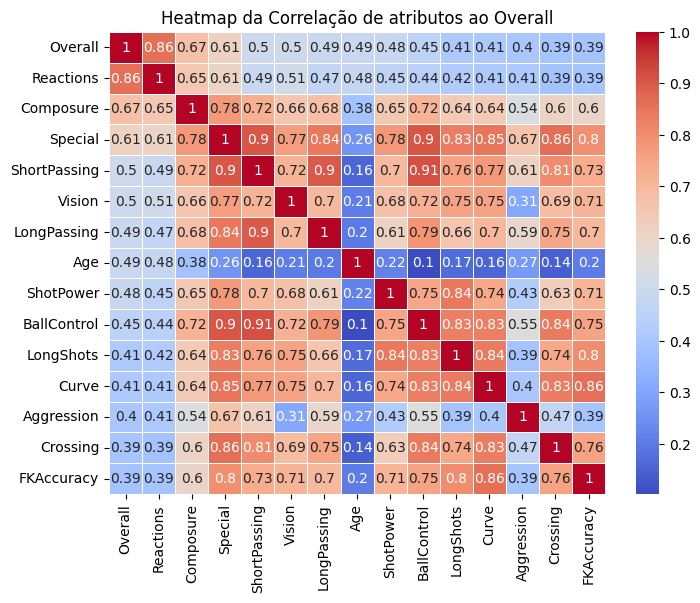

In [9]:
"""
Então fazendos um heatmap para ver se as features estão bem correlacionadas entre sí 
"""

# Colocamos o feature "Overall" devolta na nossas features para podermos fazer o heatmap
selected_attributes_overall = ['Overall'] + features_ideais
selected_attributes_overall_corr = df[selected_attributes_overall].corr()

# E Por fim plotamos o heatmap para os atributos relacionados com "Overall"
plt.figure(figsize=(8, 6))
sns.heatmap(selected_attributes_overall_corr, annot=True, cmap='coolwarm', linewidth=0.5)
plt.title('Heatmap da Correlação de atributos ao Overall')
plt.show()

In [13]:
X = X[selected_attributes_overall]

In [14]:
X

,Reactions,Composure,Special,ShortPassing,Vision,LongPassing,Age,ShotPower,BallControl,LongShots,Curve,Aggression,Crossing,FKAccuracy
14848,50.0,45.0,1371,46.0,37.0,30.0,23,39.0,45.0,20.0,21.0,47.0,46.0,40.0
1525,78.0,75.0,1946,76.0,65.0,75.0,29,78.0,72.0,66.0,42.0,80.0,52.0,53.0
13179,54.0,52.0,1452,56.0,50.0,38.0,17,59.0,58.0,49.0,47.0,39.0,42.0,34.0
12858,47.0,49.0,1489,53.0,51.0,36.0,21,68.0,59.0,54.0,49.0,56.0,50.0,43.0
8579,66.0,61.0,1640,66.0,41.0,64.0,36,65.0,51.0,57.0,68.0,76.0,60.0,47.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11511,56.0,52.0,1539,60.0,55.0,57.0,21,59.0,56.0,40.0,41.0,54.0,37.0,36.0
2562,68.0,70.0,1877,77.0,74.0,76.0,27,74.0,77.0,74.0,76.0,58.0,77.0,76.0
11772,65.0,55.0,1512,65.0,57.0,54.0,20,34.0,56.0,23.0,44.0,45.0,63.0,29.0
2105,65.0,70.0,1896,73.0,70.0,70.0,29,74.0,74.0,73.0,74.0,68.0,68.0,70.0


In [14]:
# # Fazendo um One Hot enconder da feature Influencer para os valores =[Nano, Micro, Macro e Mega]
# from sklearn.preprocessing import OneHotEncoder

# ohencoder = OneHotEncoder()
# X["Name"] = ohencoder.fit_transform(X["Name"]).toarray()
# X
# X

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [55]:
# Initialize the MLPRegressor
from sklearn.neural_network import MLPRegressor

mlp_regressor = MLPRegressor(hidden_layer_sizes=(50,50), max_iter=1000, activation='relu', random_state=42)

In [56]:
# Fit the model to the training data
mlp_regressor.fit(X_train, y_train)


MLPRegressor(hidden_layer_sizes=(50, 50), max_iter=1000, random_state=42)

In [57]:

# Make predictions
y_pred = mlp_regressor.predict(X_test)

In [58]:


# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print(f"Mean Squared Error: {mse:.2f}")
print(f"R2 Score: {r2:.2f}")

Mean Squared Error: 6.36
R2 Score: 0.87
